# Pytheam - Project 1
----

### Summary
This notebook shows the process we followed to clean, explore and analyze the data set that contains
information about a survey named "Resultados del Estudio de Movilidad Ciclista 2018: __Conteo ciclista__" .

---

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
# Resultados del Estudio de Movilidad Ciclista 2018: Conteo ciclista.
# Last update Jan-22-2019 Available in: https://datos.cdmx.gob.mx/explore/dataset/estudio-de-conteo-ciclista-2018/information/
# The json file is in the folder Resources

# Save path to data set in a variable
data_file = "../Resources/estudio-de-conteo-ciclista-2018.json"

# Load JSON file
with open(data_file) as jsonfile:
    conteo_json = json.load(jsonfile)
    

In [3]:
# Show number of records
records = len(conteo_json)
records

3185

In [ ]:
# Please don't run this cell, it's only to show the structure of one record in the JSON file
[{"datasetid": "estudio-de-conteo-ciclista-2018",
 "recordid": "f2547a0dca61d33220191b3b0e4e3faac3a44cc0",
 
 "fields": 
      {"f1": 48, "p16_3": 2, "punto_lev": 11, "resul": 1, 
     "p22": 60, "p5": 5, "p2_col": "SAN BARTOLO", "p25": 4, "p24": 1, 
     "p27": 4, "p16_6": 1, "p16_1": 2, "p20": 1, "p23": 5000, 
     "p16_2": 1, "munori": "09010", "calle_lev": "CAMINO VIEJO A MIXCOAC", 
     "p16_8": 2, "p17_2": 3, "p17_3": 2, "folio": 6, "p4_col": "SAN BARTOLO",
     "p17_1": 2, "p26_8": 1, "p7_hr": 17, "mundes": "09010", "factor": 30.26, 
     "p26_1": 2, "p26_2": 2, "p26_3": 1, "p26_4": 2, "p26_5": 2, "p26_6": 2, 
     "p26_7": 2, "nivel": 3, "p21_nivel": 4, "p8_min": 55, "p24_1": 2, "p11": 2,
     "p13": 2, "p23_1": 3, "p15": 3, "p17": 1, "p18": 1, "p19": 1, "p11_1": 0.0, 
     "p7_min": 30, "p8_hr": 17, "p3": 1, "p1": 2, "p9_1": 0.0, "p16_4": 2, 
     "p21_ano": 3, "p6": 2, "p9": 2, "p16_7": 2, "id_unico": 103, 
     "calle_2": "2DA CERRADA TORRES TEPITO", "calle_1": "3RA CERRADA TORRES TEPITO",
     "p14_3": 1, "p14_2": 1, "p14_1": 2, "p16_5": 1, "p14_4": 2}, 
 
 "record_timestamp": "2019-01-22T13:46:38-06:00"},

In [8]:
# Convert the fields to a dataframe
temp_list = []
count = 0
for enc in conteo_json:
    #print(enc["fields"])
    encuesta = dict(enc["fields"])
    temp_list.append(encuesta)
    count = count + 1

encuesta_pd = pd.DataFrame(temp_list)

In [9]:
# Show the variables
encuesta_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 70 columns):
calle_1      3176 non-null object
calle_2      1682 non-null object
calle_lev    3184 non-null object
f1           3185 non-null int64
factor       3185 non-null float64
folio        3185 non-null int64
id_unico     3185 non-null int64
mundes       3185 non-null object
munori       3185 non-null object
nivel        3185 non-null int64
p1           3185 non-null int64
p10          961 non-null float64
p11          3185 non-null int64
p11_1        3185 non-null float64
p12          575 non-null float64
p13          3184 non-null float64
p14_1        3185 non-null int64
p14_2        3185 non-null int64
p14_3        3185 non-null int64
p14_4        3185 non-null int64
p15          3185 non-null int64
p16_1        3185 non-null int64
p16_2        3185 non-null int64
p16_3        3185 non-null int64
p16_4        3185 non-null int64
p16_5        3185 non-null int64
p16_6        3185 non-

In [10]:
# Create a dataframe with certain columns
df_var_enc = encuesta_pd.loc[:, ["f1", "p1", "p3", "p5", "p6", "p14_4", "p15", "p20", "nivel", "p24"]]
df_var_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 10 columns):
f1       3185 non-null int64
p1       3185 non-null int64
p3       3185 non-null int64
p5       3185 non-null int64
p6       3185 non-null int64
p14_4    3185 non-null int64
p15      3185 non-null int64
p20      3185 non-null int64
nivel    3185 non-null int64
p24      3185 non-null int64
dtypes: int64(10)
memory usage: 248.9 KB


In [11]:
# Show the results
df_var_enc.head()

,f1,p1,p3,p5,p6,p14_4,p15,p20,nivel,p24
0,48,2,1,5,2,2,3,1,3,1
1,19,1,2,5,1,3,1,1,4,1
2,35,1,3,2,9,4,10,1,5,1
3,16,2,2,3,8,4,3,1,3,6
4,43,2,2,4,1,4,10,1,1,1


In [12]:
# Define values for the questions 1. ¿De qué lugar viene usted? and 3. ¿A dónde se dirige?
p1_p3 = [{'id' : "1", 'name' : "Home"},
         {'id' : "2", 'name' : "Work"},
         {'id' : "3", 'name' : "School"}, 
         {'id' : "4", 'name' : "Mall, store, market"},
         {'id' : "5", 'name' : "Another house"},
         {'id' : "6", 'name' : "Restaurant, bar, coffee shop"}, 
         {'id' : "7", 'name' : "Other"}, 
         {'id' : "98", 'name' : "Unknown"}, 
         {'id' : "99", 'name' : "Unknown"}]

# Map values for the question 1. ¿De qué lugar viene usted?  3. ¿A dónde se dirige?
df_var_enc['Origen'] = df_var_enc["p1"].map({int(i['id']):i["name"] for i in p1_p3})

# Map values for the question 3. ¿A dónde se dirige?
df_var_enc['Destino'] = df_var_enc["p3"].map({int(i['id']):i["name"] for i in p1_p3})

In [13]:
# Define values for the question 5 En el lugar a donde llegará ¿En dónde va a estacionar la bicicleta?
# We only translate to English the question that were included in our presentation
p5 = [{'id' : "1", 'name' : "Biciestacionamiento al aire libre"},
      {'id' : "2", 'name' : "Biciestacionamiento cubierto"},
      {'id' : "3", 'name' : "En un estacionamiento junto con autos"}, 
      {'id' : "4", 'name' : "En un poste, reja o mueble urbano"}, 
      {'id' : "5", 'name' : "La voy a guardar dentro del edificio al que voy por que no hay estacionamientos"},
      {'id' : "6", 'name' : "La dejaré en una estación por que es rentada (ecobici| mobike| vbike)"}, 
      {'id' : "8", 'name' : "No sabe"}, 
      {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 5
df_var_enc['Lugar_Estac'] = df_var_enc["p5"].map({int(i['id']):i["name"] for i in p5})

In [14]:
# Define values for the question 6. ¿Cuál es el motivo de su viaje?
p6 = [{'id' : "1", 'name' : "Go to work"},
       {'id' : "2", 'name' : "Back to home"}, 
       {'id' : "3", 'name' : "Go to school"}, 
       {'id' : "4", 'name' : "Shopping"}, 
       {'id' : "5", 'name' : "Carry or pick someone"},
       {'id' : "6", 'name' : "Recreation"},
       {'id' : "7", 'name' : "Go to eat"},
       {'id' : "8", 'name' : "Work related"}, 
       {'id' : "9", 'name' : "Carry out administrative procedures"},
       {'id' : "10", 'name' : "Go visit someone"},
       {'id' : "98", 'name' : "Unknown"},
       {'id' : "99", 'name' : "No answer"}]

# Map values for the question 6
df_var_enc['Motivo'] = df_var_enc["p6"].map({int(i['id']):i["name"] for i in p6})

In [15]:
# Define values for the question 14. ¿Qué tanto ha influido los siguientes elementos para decidir 
# usar la bicicleta como medio de transporte? option 4 Que exista el sistema ECOBICI
# We only translate to English the question that were included in our presentation
p14_4 = [{'id' : "1", 'name' : "Mucho"},
         {'id' : "2", 'name' : "Algo"},
         {'id' : "3", 'name' : "Poco"},
         {'id' : "4", 'name' : "Nada"},
         {'id' : "8", 'name' : "No sabe"},
         {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 14_4
df_var_enc['Influye_Ecobici'] = df_var_enc["p14_4"].map({int(i['id']):i["name"] for i in p14_4})

In [16]:
# Define values for the question 15. ¿Por qué motivo dejaría de usar la bicicleta para hacer este viaje?
# We only translate to English the question that were included in our presentation
p15 = [{'id' : "1", 'name' : "Por estar lesionado o incapacitado"},
        {'id' : "2", 'name' : "Por una falla mecanica de la bici"},
        {'id' : "3", 'name' : "Por cambiar de trabajo"},
        {'id' : "4", 'name' : "Por llevar prisa"},
        {'id' : "5", 'name' : "Por que el recorrido es muy largo"},
        {'id' : "6", 'name' : "Por falta de infraestructura"},
        {'id' : "7", 'name' : "Por el clima"},
        {'id' : "8", 'name' : "Inseguridad"},
        {'id' : "9", 'name' : "Que no haya una bici disponible"},
        {'id' : "10", 'name' : "Por ningún motivo la dejaría de usar"},
        {'id' : "11", 'name' : "No sabe"},
        {'id' : "12", 'name' : "No contestó"}]

# Map values for the question 15
df_var_enc['Motivo_NoUso'] = df_var_enc["p15"].map({int(i['id']):i["name"] for i in p15})

In [17]:
# Define values for the question 20. Sexo
# We only translate to English the question that were included in our presentation
p20 = [{'id' : "1", 'name' : "Hombre"}, {'id' : "2", 'name' : "Mujer"}, {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 20
df_var_enc['Genero'] = df_var_enc["p20"].map({int(i['id']):i["name"] for i in p20})

In [18]:
# Define values for the question Categoría de nivel educativo
# We only translate to English the question that were included in our presentation
nivel = [{'id' : "1", 'name' : "Ninguno"},
         {'id' : "2", 'name' : "Primaria"},
         {'id' : "3", 'name' : "Secundaria"},
         {'id' : "4", 'name' : "Preparatoria o Bachillerato"},
         {'id' : "5", 'name' : "Licenciatura o Posgrado"},
         {'id' : "98", 'name' : "No sabe"}, 
         {'id' : "99", 'name' : "No contestó"}]

# Map values for the question 
df_var_enc['Nivel_Estudios'] = df_var_enc["nivel"].map({int(i['id']):i["name"] for i in nivel})

In [19]:
# Define values for the question 24. Tipo de bicicleta
p24 = [{'id' : "1", 'name' : "Own"},
        {'id' : "2", 'name' : "ECOBICI"},
        {'id' : "3", 'name' : "Mobike"},
        {'id' : "4", 'name' : "Vbike"},
        {'id' : "5", 'name' : "Dezba"},
        {'id' : "6" , 'name' : "Other"},
        {'id' : "9" , 'name' : "Unknown"}]

# Map values for the question 24
df_var_enc['Tipo_Bici'] = df_var_enc["p24"].map({int(i['id']):i["name"] for i in p24})

In [20]:
# Change the name of the column that has the age of the person
df_var_enc = df_var_enc.rename(columns={"f1": "Edad"})

In [21]:
# Show the results
df_var_enc

,Edad,p1,p3,p5,p6,p14_4,p15,p20,nivel,p24,Origen,Destino,Lugar_Estac,Motivo,Influye_Ecobici,Motivo_NoUso,Genero,Nivel_Estudios,Tipo_Bici
0,48,2,1,5,2,2,3,1,3,1,Work,Home,La voy a guardar dentro del edificio al que vo...,Back to home,Algo,Por cambiar de trabajo,Hombre,Secundaria,Propia
1,19,1,2,5,1,3,1,1,4,1,Home,Work,La voy a guardar dentro del edificio al que vo...,Go to work,Poco,Por estar lesionado o incapacitado,Hombre,Preparatoria o Bachillerato,Propia
2,35,1,3,2,9,4,10,1,5,1,Home,School,Biciestacionamiento cubierto,Carry out administrative procedures,Nada,Por ningún motivo la dejaría de usar,Hombre,Licenciatura o Posgrado,Propia
3,16,2,2,3,8,4,3,1,3,6,Work,Work,En un estacionamiento junto con autos,Work related,Nada,Por cambiar de trabajo,Hombre,Secundaria,Otro
4,43,2,2,4,1,4,10,1,1,1,Work,Work,"En un poste, reja o mueble urbano",Go to work,Nada,Por ningún motivo la dejaría de usar,Hombre,Ninguno,Propia
5,46,2,1,5,2,4,10,1,3,1,Work,Home,La voy a guardar dentro del edificio al que vo...,Back to home,Nada,Por ningún motivo la dejaría de usar,Hombre,Secundaria,Propia
6,18,1,2,4,1,3,4,1,2,1,Home,Work,"En un poste, reja o mueble urbano",Go to work,Poco,Por llevar prisa,Hombre,Primaria,Propia
7,54,1,7,4,9,4,3,1,3,1,Home,Other,"En un poste, reja o mueble urbano",Carry out administrative procedures,Nada,Por cambiar de trabajo,Hombre,Secundaria,Propia
8,19,1,2,1,1,4,8,1,3,1,Home,Work,Biciestacionamiento al aire libre,Go to work,Nada,Inseguridad,Hombre,Secundaria,Propia
9,50,1,2,1,1,4,2,2,2,1,Home,Work,Biciestacionamiento al aire libre,Go to work,Nada,Por una falla mecanica de la bici,Mujer,Primaria,Propia


In [167]:
# Show the details of the data frame
df_var_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 19 columns):
Edad               3185 non-null int64
p1                 3185 non-null int64
p3                 3185 non-null int64
p5                 3185 non-null int64
p6                 3185 non-null int64
p14_4              3185 non-null int64
p15                3185 non-null int64
p20                3185 non-null int64
nivel              3185 non-null int64
p24                3185 non-null int64
Origen             3185 non-null object
Destino            3185 non-null object
Lugar_Estac        3179 non-null object
Motivo             3185 non-null object
Influye_Ecobici    3185 non-null object
Motivo_NoUso       3185 non-null object
Genero             3184 non-null object
Nivel_Estudios     3185 non-null object
Tipo_Bici          3185 non-null object
dtypes: int64(10), object(9)
memory usage: 472.9+ KB


In [22]:
# Create a dataframe with the number of "unidades económicas" by municipio and sector
df_gen = pd.DataFrame(df_var_enc["Genero"].value_counts())

# Reset index
df_gen.reset_index(inplace=True)

# Show the results
df_gen

,index,Genero
0,Hombre,2656
1,Mujer,528
2,No contestó,1


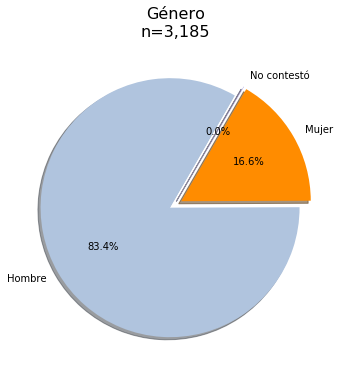

In [44]:
# Set values for the plot properties
plt.title("Género\nn=3,185", fontsize=16)

# Prepare the data for plotting
colors = ["lightsteelblue", "darkorange", "slateblue"]   # lightskyblue lightcoral
explode = (0.05, 0.05, 0.05)

fig, a = plt.subplots(figsize=(5, 8), subplot_kw=dict(aspect="equal"))

# Plot the data
plt.pie( df_gen['Genero'], explode=explode, labels=df_gen['index'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)

# Save the Figure
plt.tight_layout()
plt.savefig("../Output/cc_genero.png")

# Show the Figure
plt.show()

In [24]:
# Group the information to show the routes (from - to)
df_tray = pd.DataFrame(df_var_enc.groupby(['Origen', 'Destino']).p1.count())

# Reset the index and rename the column for clarity
df_tray.reset_index(inplace=True)
df_tray = df_tray.rename(columns={"p1": "Cuenta"})

In [25]:
# Show the values ordered from largest to smallest
df_tray.sort_values(by=['Cuenta'], ascending=False)

,Origen,Destino,Cuenta
15,Home,Work,761
38,Work,Home,573
10,Home,"Mall, store, market",298
11,Home,Other,231
44,Work,Work,181
33,School,Home,149
8,Home,Another house,146
13,Home,School,145
17,"Mall, store, market",Home,135
24,Other,Home,99


In [26]:
# Make a view of the data for work purposes only 
only_work = df_tray.loc[(df_tray['Origen'] == "Work") | (df_tray['Destino'] == "Work"),:]

# Show the values ordered from largest to smallest
only_work.sort_values(by=['Cuenta'], ascending=False)

,Origen,Destino,Cuenta
15,Home,Work,761
38,Work,Home,573
44,Work,Work,181
39,Work,"Mall, store, market",84
40,Work,Other,82
37,Work,Another house,29
29,Other,Work,27
42,Work,School,19
22,"Mall, store, market",Work,18
41,Work,"Restaurant, bar, coffee shop",14


In [60]:
# Calculate the sum of the trips done for work purposes only 
only_work.Cuenta.sum()

1819

In [27]:
# Calculate the percent of the trips done for work purposes only 
work_related = (only_work['Cuenta'].sum() / records) * 100  #3185

# Show the results
print("The {}% of {} persons used the bicycle for work related activities".format('%.2f'% (work_related), records))

The 57.11% of 3185 persons used the bicycle for work related activities


In [53]:
# Make a view of the data for home trips
ori_home = df_tray.loc[(df_tray['Origen'] == "Home"),:]

# Show the values ordered from largest to smallest
ori_home.sort_values(by=['Cuenta'], ascending=False)

# Calculate the sum of the trips
ori_home['Cuenta'].sum()

1604

In [54]:
# Make a view of the data for home trips
ori_school = df_tray.loc[(df_tray['Origen'] == "School"),:]

# Show the values ordered from largest to smallest
ori_school.sort_values(by=['Cuenta'], ascending=False)     

# Calculate the sum of the trips
ori_school['Cuenta'].sum()

161

In [55]:
# Make a view of the data for other trips
ori_other = df_tray.loc[(df_tray['Origen'] == "Other"),:]

# Show the values ordered from largest to smallest
ori_other.sort_values(by=['Cuenta'], ascending=False)     

# Calculate the sum of the trips
ori_other['Cuenta'].sum()

157

In [29]:
# Create a dataframe to analize age
df_age = pd.DataFrame(df_var_enc["Edad"].value_counts())

# Reset index and rename columns
df_age.reset_index(inplace=True)
df_age = df_age.rename(columns={"index": "Age", "Edad": "Count"})

# Show the minimum age
df_age.min()

Age      12
Count     1
dtype: int64

In [30]:
# Create the bins in which Data will be held
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create the names for the four bins
group_names = ["12-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

# Create column with the bins
df_age["Groups"] = pd.cut(df_age["Age"], bins, labels=group_names)

# Creating a group based off of the bins
df = df_age.groupby("Groups").count()

# Show the results
df

,Age,Count
Groups,,
12-20,9,9
21-30,10,10
31-40,10,10
41-50,10,10
51-60,10,10
61-70,10,10
71-80,10,10
81-90,6,6
91-100,2,2


In [31]:
# Create a dataframe with the values of field origen
df_ori = pd.DataFrame(df_var_enc["Origen"].value_counts())

# Reset index
df_ori.reset_index(inplace=True)

# Show the results
df_ori

,index,Origen
0,Home,1604
1,Work,984
2,"Mall, store, market",179
3,School,161
4,Other,157
5,Another house,84
6,"Restaurant, bar, coffee shop",16


In [32]:
# Create a dataframe with the values of field destino
df_des = pd.DataFrame(df_var_enc["Destino"].value_counts())

# Reset index
df_des.reset_index(inplace=True)

# Show the results
df_des

,index,Destino
0,Home,1029
1,Work,1016
2,"Mall, store, market",404
3,Other,336
4,Another house,194
5,School,172
6,"Restaurant, bar, coffee shop",28
7,Unknown,6


In [33]:
# Merge the dataframes origen-destino
df_lug = pd.merge(df_ori, df_des, on="index", how="outer")

# Fill with zero the not a number values
df_lug = df_lug.fillna(0)

# Change the type of the field origen
df_lug["Origen"] = df_lug["Origen"].astype(int)

# Show the results
df_lug["Origen"]

0    1604
1     984
2     179
3     161
4     157
5      84
6      16
7       0
Name: Origen, dtype: int32

In [34]:
# Show the results
df_lug["Destino"]

0    1029
1    1016
2     404
3     172
4     336
5     194
6      28
7       6
Name: Destino, dtype: int64

In [35]:
# Show the results
df_lug["index"]

0                            Home
1                            Work
2             Mall, store, market
3                          School
4                           Other
5                   Another house
6    Restaurant, bar, coffee shop
7                         Unknown
Name: index, dtype: object

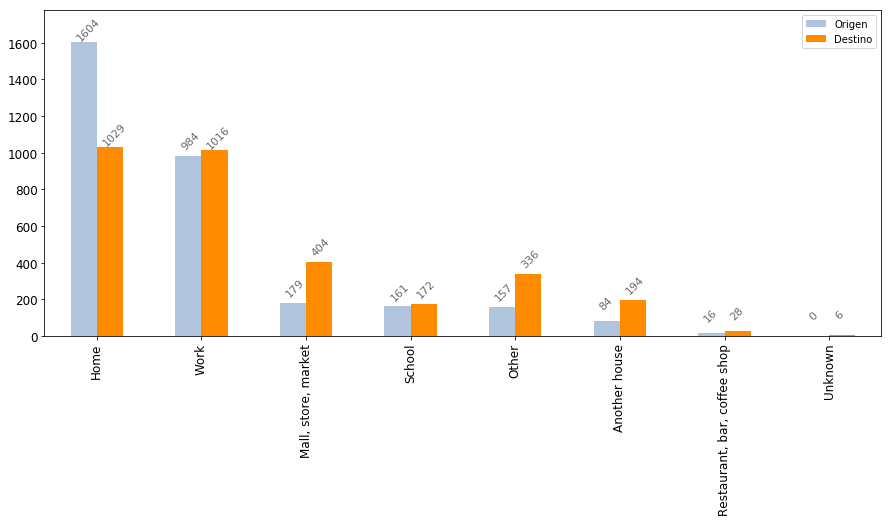

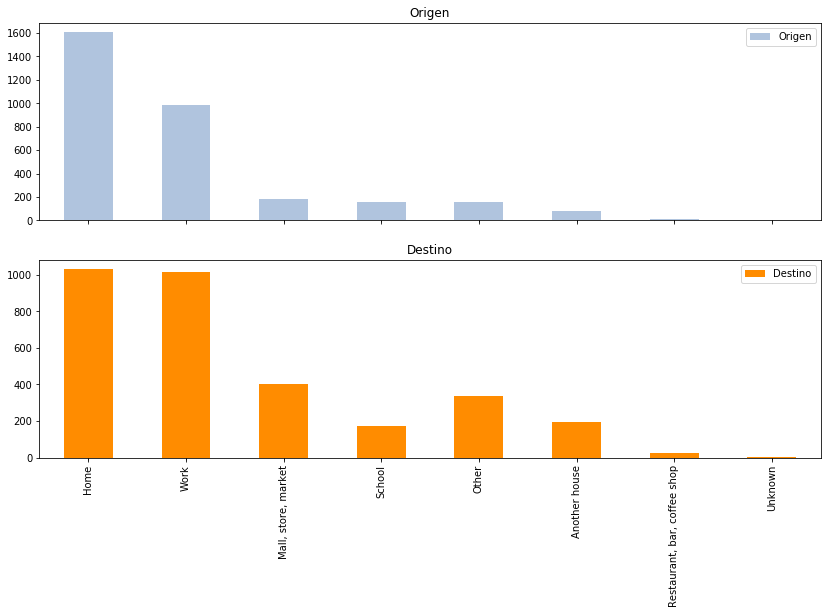

In [37]:
# Create a dataframe to plot the values from origen to destino
df = pd.DataFrame({'Origen': df_lug["Origen"].tolist(),
                   'Destino': df_lug["Destino"].tolist()}, index=df_lug["index"].tolist())

# Set the values for the properties
ax.set_ylim(0,1780)

# Plot the values in one graph
ax = df.plot(kind='bar', rot="vertical", figsize=(15,6), color=["lightsteelblue", "darkorange"], fontsize=12, align="center")

# set individual bar labels
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)
    
# Plot the values in two graphs
axes = df.plot.bar(rot="vertical", subplots=True, figsize=(14, 8), color=["lightsteelblue", "darkorange"], legend=True)

# Set the location for the legend
axes[1].legend(loc="best") 


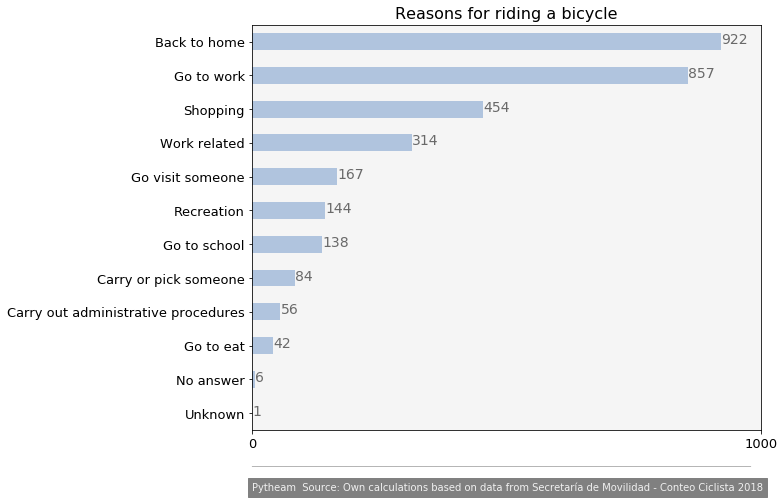

In [52]:
# Set the dataframe to plot
ax = df_var_enc['Motivo'].value_counts().plot(kind='barh', figsize=(11,7), color="darkorange", fontsize=13)  

# Set values for the plot properties
ax.set_alpha(0.8)
ax.set_title("Reasons for riding a bicycle", fontsize=16)
ax.set_xticks([0, 1000])
ax.set_facecolor('whitesmoke')
ax.text(x = -.8, y = 12.5,
    s = '____________________________________________________________________________________________________',
    color = 'grey', alpha = .7)
ax.text(x = -.6, y = 13.3,
    s = 'Pytheam  Source: Own calculations based on data from Secretaría de Movilidad - Conteo Ciclista 2018',fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# Set individual bar labels
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# Invert for largest on top 
ax.invert_yaxis()

# Save the Figure
plt.tight_layout()
plt.savefig("../Output/Reason.png")

# Show the Figure
plt.show()

In [54]:
# Create a dataframe with different values for the field nivel de estudios
df_est = pd.DataFrame(df_var_enc["Nivel_Estudios"].value_counts())

# Reset index
df_est.reset_index(inplace=True)

# Show the results
df_est

,index,Nivel_Estudios
0,Secundaria,1100
1,Preparatoria o Bachillerato,1074
2,Primaria,454
3,Licenciatura o Posgrado,380
4,Ninguno,171
5,No contestó,4
6,No sabe,2


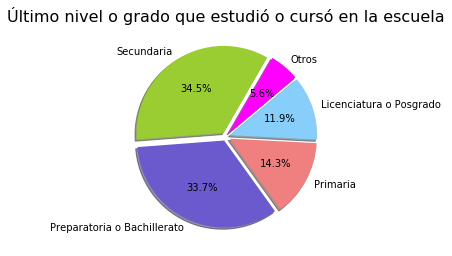

In [55]:
# Set the title
plt.title("Último nivel o grado que estudió o cursó en la escuela", fontsize=16)

# Prepare the data for plotting
levels = df_est['index'].tolist()
values = df_est['Nivel_Estudios'].tolist()

# Insert a level to group the options "no sabe" and "no contestó"
levels.insert(4, "Otros")
values.insert(4, 177)

# Define the colors and the separation between the layers of the pie chart
colors = ["yellowgreen", "slateblue", "lightcoral", "lightskyblue", "magenta", "green", "red"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Plot the values
plt.pie(values[0:-3], explode=explode[0:-3], labels=levels[0:-3], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)

# Show the plot
plt.show()

In [57]:
# Show the different values for the field 
df_var_enc['Influye_Ecobici'].value_counts()

Nada           1371
Mucho           743
Poco            474
Algo            414
No sabe         126
No contestó      57
Name: Influye_Ecobici, dtype: int64

In [56]:
# Show the different values for the field 
df_var_enc['Lugar_Estac'].value_counts()

La voy a guardar dentro del edificio al que voy por que no hay estacionamientos    1319
En un poste, reja o mueble urbano                                                   922
Biciestacionamiento al aire libre                                                   399
En un estacionamiento junto con autos                                               266
Biciestacionamiento cubierto                                                        183
No sabe                                                                              47
No contestó                                                                          24
La dejaré en una estación por que es rentada (ecobici| mobike| vbike)                19
Name: Lugar_Estac, dtype: int64

In [58]:
# Show the different values for the field 
df_var_enc['Tipo_Bici'].value_counts()

Propia     2968
Otro         91
ECOBICI      65
Mobike       39
Vbike        20
No sabe       1
Dezba         1
Name: Tipo_Bici, dtype: int64

In [290]:
# Show the different values for the field 
df_var_enc['Motivo_NoUso'].value_counts()

Por estar lesionado o incapacitado      1044
Por una falla mecanica de la bici        503
Por ningún motivo la dejaría de usar     443
Por el clima                             311
Inseguridad                              220
Por cambiar de trabajo                   204
Por que el recorrido es muy largo        165
Por llevar prisa                         139
Por falta de infraestructura              64
Que no haya una bici disponible           59
No sabe                                   28
No contestó                                5
Name: Motivo_NoUso, dtype: int64

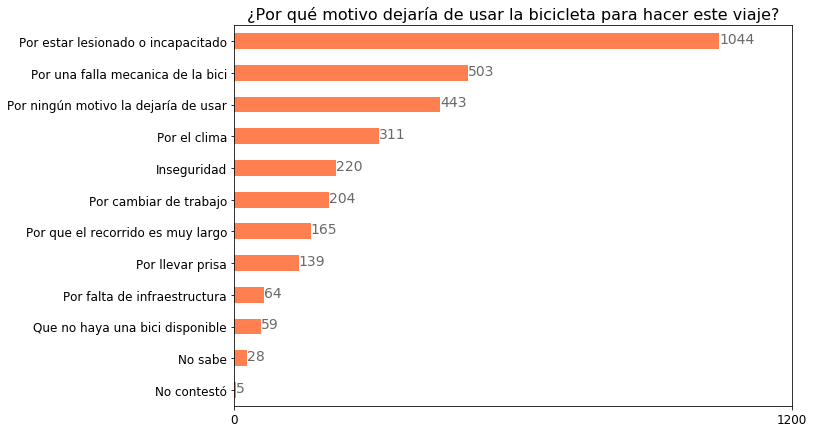

In [295]:
# Prepare the data for the plot and set the value for the properties
ax = df_var_enc['Motivo_NoUso'].value_counts().plot(kind='barh', figsize=(10,7), color="coral", fontsize=12);
ax.set_alpha(0.8)
ax.set_title("¿Por qué motivo dejaría de usar la bicicleta para hacer este viaje?", fontsize=16)
ax.set_xticks([0, 1200])

# set individual bar labels using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()